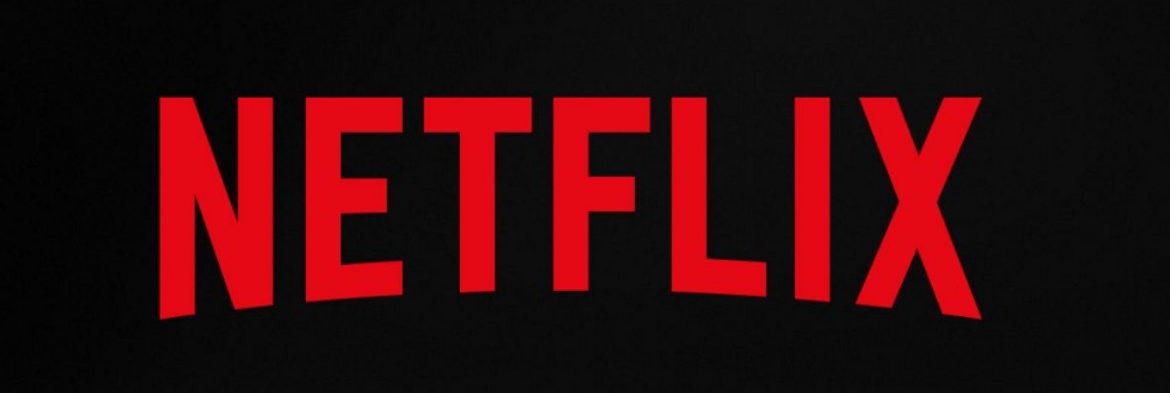

# Projeto 3 - Análise de Dados com Python com Sugestões de Filmes da **Netflix**
O que vamos assistir? Provavelmente essa é a pergunta que se faz quando está disponível uma enorme quantidade de filmes, séries e documentários disponíveis na Netflix, e escolher um deles é realmente uma dor de cabeça.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

In [30]:
df = pd.read_csv('./data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [31]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [32]:
# Filtrar os filmes
df_filme = df.loc[df.type=='Movie',:].reset_index()
df_filme.title = df_filme.title.str.lower()
df_filme.drop('index', axis='columns', inplace=True)
df_filme.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,norm of the north: king sized adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,jandino: whatever it takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
3,70304989,Movie,automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
4,80164077,Movie,fabrizio copano: solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


In [33]:
# Verificar duplicidades
print('Filmes Duplicados:', df_filme.duplicated().sum())

Filmes Duplicados: 0


## Estatísticas em tipos diferentes

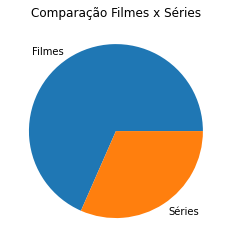

In [34]:
# plt.figure(figsize=(10,6))
plt.pie([len(df_filme.index), len(df.loc[df.type=='TV Show',:].index)], 
        labels=['Filmes', 'Séries'],
        # explode=(0.1, 0),
        # autopct='%2.2f%%',
        # shadow=True,
        # startangle=120
       )
plt.title('Comparação Filmes x Séries')
plt.show()

## Estatísticas de colunas numéricas

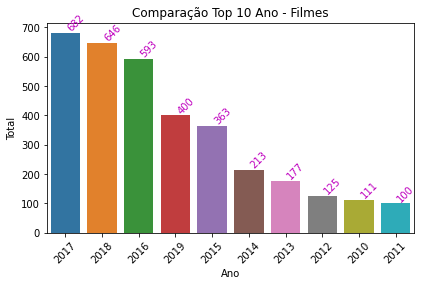

In [35]:
top_ano = df_filme['release_year'].value_counts().rename_axis('Ano').reset_index(name='Total')[:10]
# plt.figure(figsize=(10,5))
# sns.set(style="whitegrid", color_codes=True)
ax = sns.barplot(top_ano.index, top_ano.Total) #, palette='Blues_d')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel='Ano', ylabel='Total')
ax.set_xticklabels(top_ano.Ano)
for item in ax.get_xticklabels(): item.set_rotation(45)
for i, v in enumerate(top_ano['Total'].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.title('Comparação Top 10 Ano - Filmes')
# sns.despine(left=True, bottom=False)
plt.show()

## Estatísticas de colunas categoricas

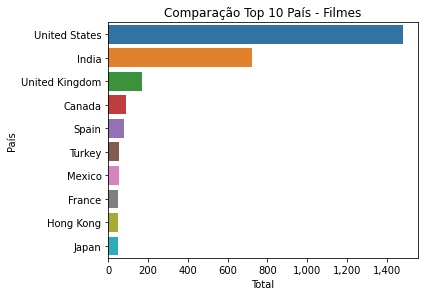

In [36]:
top_pais = df_filme['country'].value_counts().rename_axis('País').reset_index(name='Total')[:10]
# plt.figure(figsize=(10,8))
# sns.set(style="whitegrid")
ax = sns.barplot(y=top_pais.index, x=top_pais.Total, orient='h') #, palette='Blues_d')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(ylabel='País', xlabel='Total')
ax.set_yticklabels(top_pais['País'])
plt.tight_layout()
plt.title('Comparação Top 10 País - Filmes')
# sns.despine(left=False, bottom=True)
plt.show()

## Sistema de Recomendação

In [37]:
# 1. Selecionar as colunas
colunas = ['director', 'cast', 'country', 'description', 'listed_in']

# 2. Garantir que não exista elementos nulos
for coluna in colunas:
    df_filme[coluna] = df_filme[coluna].fillna('')
    
# 3. Montar um retorno
def montar(obs):
    return obs['director'] + ' ' + obs['cast'] + ' ' + obs['country'] + ' ' + obs['description'] + ' ' + obs['listed_in']
df_filme['obsCombinada'] = df_filme.apply(montar, axis=1)
df_filme.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,obsCombinada
0,81145628,Movie,norm of the north: king sized adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,"Richard Finn, Tim Maltby Alan Marriott, Andrew..."
1,80117401,Movie,jandino: whatever it takes,,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,Jandino Asporaat United Kingdom Jandino Aspor...
2,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,"Fernando Lebrija Nesta Cooper, Kate Walsh, Joh..."
3,70304989,Movie,automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...","Gabe Ibáñez Antonio Banderas, Dylan McDermott,..."
4,80164077,Movie,fabrizio copano: solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,"Rodrigo Toro, Francisco Schultz Fabrizio Copan..."


In [38]:
# 4. Criar uma matriz de similaridade para essa coluna combinada
cv = CountVectorizer()
count_matrix = cv.fit_transform(df_filme['obsCombinada'])
cosine_sim = cosine_similarity(count_matrix)

In [39]:
# 5. Métodos para obter o filme
def sugestao(index):
    obs = df_filme[df_filme.index == index]
    return obs['title'].values[0] + " - Gênero: " + obs['listed_in'].values[0]

def indice_por_tit(title):
    try:
        return df_filme[df_filme.title == title].index
    except:
        return df_filme[df_filme.title == title].index

In [40]:
# 6. Pegar um filme por uma lista Top 5 de similaridades
def recomendarFilme(meuFilme):
    indiceMeuFilme = indice_por_tit(meuFilme.lower())
    if len(indiceMeuFilme) != 0:
        similares = list(enumerate(cosine_sim[indiceMeuFilme.values[0]]))
        ordenar_similares = sorted(similares, key=lambda x:x[1], reverse=True)[1:]
        if len(ordenar_similares) > 0:
            i=0
            print("Top 5 Similares a", meuFilme + ":\n")
            for elemento in ordenar_similares:
                print('.', sugestao(elemento[0]))
                i += 1
                if i >= 5:
                    break
        else:
            print('Não existem filmes similares na Netflix')
    else:
        print('Filme não encontrado no catálogo da Netflix')

In [41]:
# Agora podemos ver os filmes que mais nos agradam...
recomendarFilme('Bright')

Top 5 Similares a Bright:

. men in black ii - Gênero: Action & Adventure, Comedies, Sci-Fi & Fantasy
. beyond skyline - Gênero: Action & Adventure, Sci-Fi & Fantasy
. pocoyo halloween: space halloween - Gênero: Movies
. wild wild west - Gênero: Action & Adventure, Comedies, Sci-Fi & Fantasy
. how it ends - Gênero: Action & Adventure, Sci-Fi & Fantasy


# Top 8 dos Modelos de Machine Learning

<span style="display:block;text-align:center">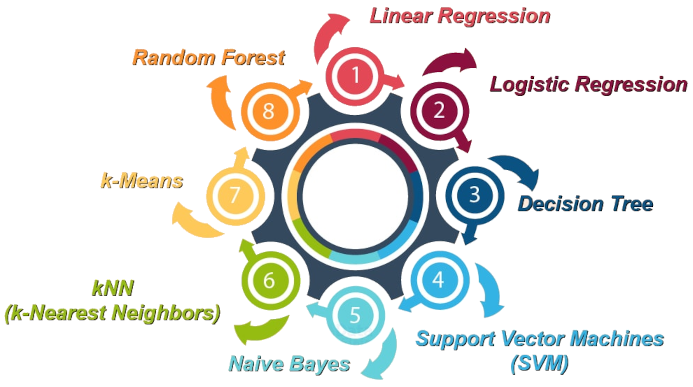</align>

## 3. Árvore de Decisão
Uma árvore de decisão é utilizada principalmente para classificação de dados. Este modelo pega uma instância, atravessa a árvore e compara recursos importantes com uma determinada declaração condicional. Se ele desce para o ramo filho esquerdo ou direito depende do resultado. Normalmente, os recursos mais importantes estão mais próximos da raiz.

In [1]:
import pandas as pd
# import numpy as np
# from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
aluguel = pd.read_csv('./data/bike_rental_hour.csv')
aluguel.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# cnt: contagem do total de bicicletas alugadas, incluindo bicicletas casuais e registradas
correlations = aluguel.corr()
correlations['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [4]:
# Obter somente as colunas numericas e com correlacoes positivas acima de 4
colunas = aluguel.columns.drop(['cnt', 'instant', 'season', 'yr', 'mnth', 'hr', 'weekday', 'workingday', 'windspeed', 'dteday', 'holiday', 'weathersit', 'hum'])
colunas

Index(['temp', 'atemp', 'casual', 'registered'], dtype='object')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(aluguel[colunas], aluguel['cnt'], test_size=0.3)
print(len(X_train), len(X_test))

12165 5214


In [24]:
X_train # .temp.plot(kind='hist')

,temp,atemp,casual,registered
10030,0.42,0.4242,6,50
12692,0.54,0.5152,9,5
10872,0.32,0.3333,0,1
12630,0.66,0.6212,106,180
10154,0.34,0.3333,3,11
...,...,...,...,...
3680,0.60,0.5758,10,116
12567,0.68,0.6364,36,350
14445,0.62,0.5909,3,14
16708,0.42,0.4242,9,93


In [25]:
def obter_score(mdl, Xtrn, Xtst, ytrn, ytst):
    mdl.fit(Xtrn, ytrn.values.ravel())
    return float(format(mdl.score(Xtst, ytst), '.8f'))

In [26]:
mdl_dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
obter_score(mdl_dt, X_train, X_test, y_train, y_test)

0.06003069

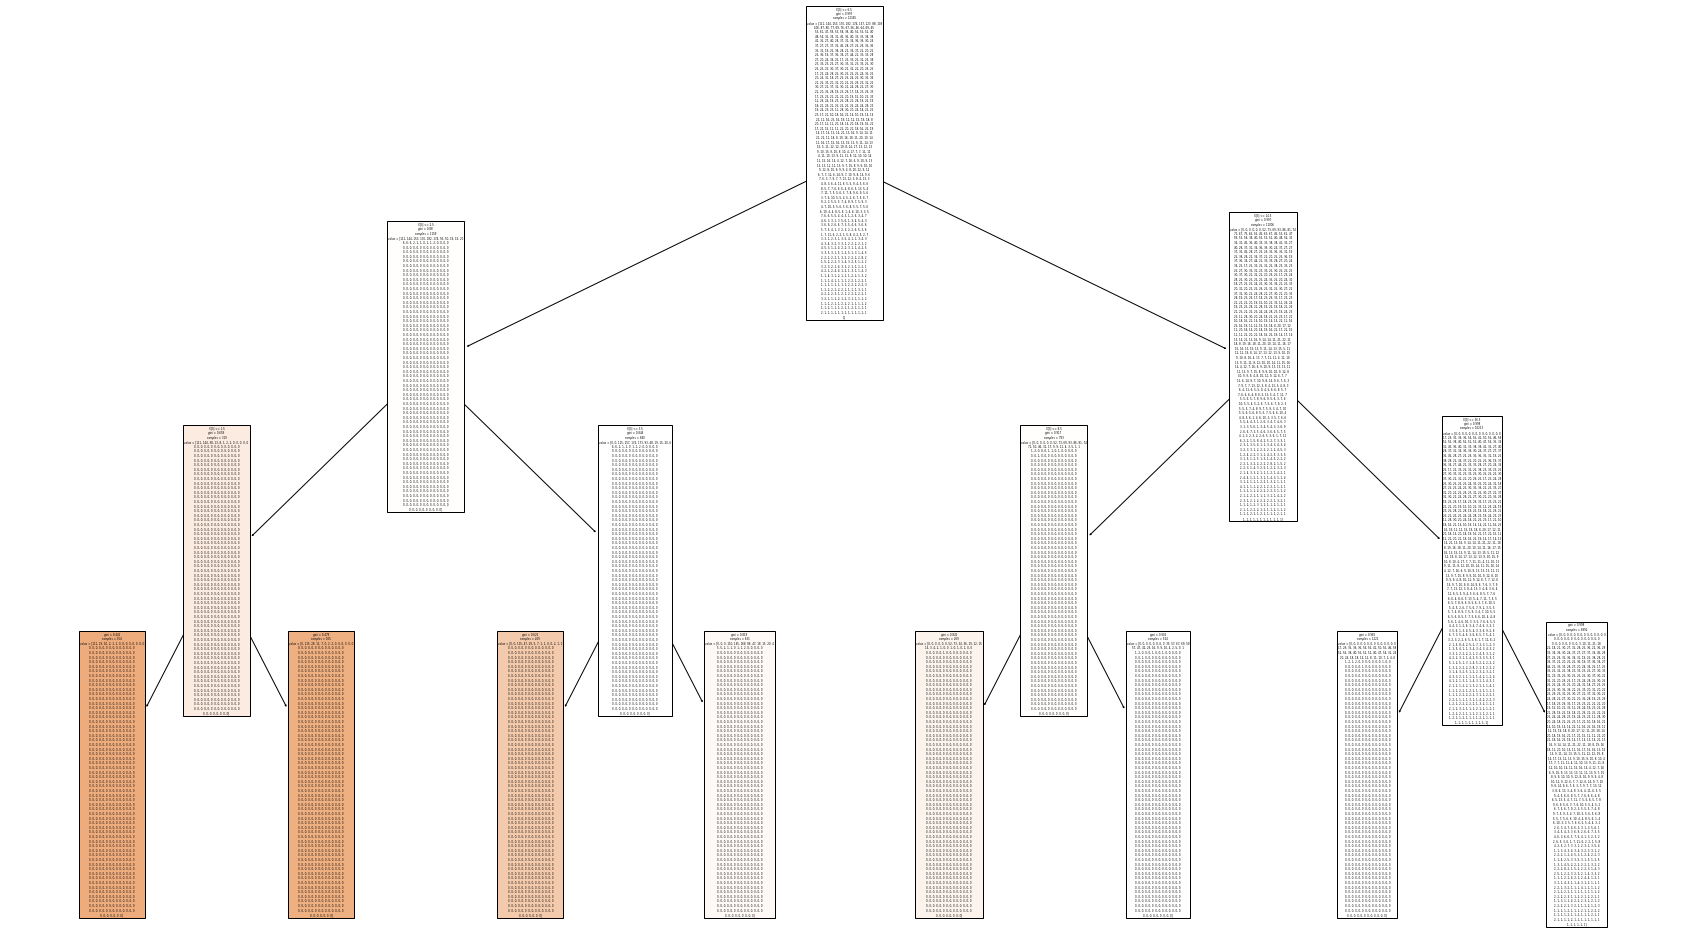

In [27]:
plt.figure(figsize=(30,15))
mdl_dt = mdl_dt.fit(X_train, y_train)
tree.plot_tree(mdl_dt, filled=True)
plt.show()

## 8. Floresta Aleatória
Várias árvores trabalhando com partes dos dados para obter um melhor resultado

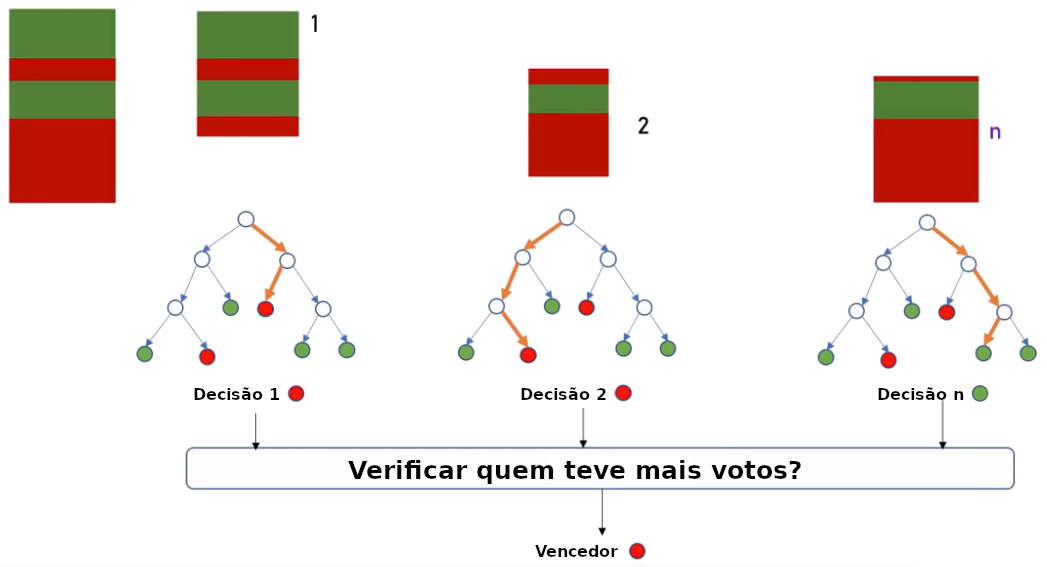

In [28]:
mdl_rf = RandomForestClassifier(n_estimators=20, max_features=3, max_depth=3, min_samples_leaf=5)
obter_score(mdl_rf, X_train, X_test, y_train, y_test)

0.08247027